# Project: Predicting Stock Price & Return  
Deep Learning
## ver 0.1  
All guidance and guildlines provided by Romeo Kienzler

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [58]:
#let the notebook display full length of the data columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [59]:
df = pd.read_csv("data_feature_created.csv")

In [60]:
feature_names = ['loblaw_ma14', 'loblaw_rsi14', 'loblaw_ma30', 'loblaw_rsi30', 'loblaw_ma50', 'loblaw_rsi50', 'loblaw_ma200', 'loblaw_rsi200', 'loblaw_price', 'metro_ma14', 'metro_rsi14', 'metro_ma30', 'metro_rsi30', 'metro_ma50', 'metro_rsi50', 'metro_ma200', 'metro_rsi200', 'metro_price', 'gwl_ma14', 'gwl_rsi14', 'gwl_ma30', 'gwl_rsi30', 'gwl_ma50', 'gwl_rsi50', 'gwl_ma200', 'gwl_rsi200', 'gwl_price', 'empa_ma14', 'empa_rsi14', 'empa_ma30', 'empa_rsi30', 'empa_ma50', 'empa_rsi50', 'empa_ma200', 'empa_rsi200', 'empa_price', 'atd_ma14', 'atd_rsi14', 'atd_ma30', 'atd_rsi30', 'atd_ma50', 'atd_rsi50', 'atd_ma200', 'atd_rsi200', 'atd_price', 'tsx_ma14', 'tsx_rsi14', 'tsx_ma30', 'tsx_rsi30', 'tsx_ma50', 'tsx_rsi50', 'tsx_ma200', 'tsx_rsi200', 'tsx_price', 'sp500_ma14', 'sp500_rsi14', 'sp500_ma30', 'sp500_rsi30', 'sp500_ma50', 'sp500_rsi50', 'sp500_ma200', 'sp500_rsi200', 'sp500_price', 'BCPI', 'CPI', 'bank_interest', 'CEER', 'trend_grocery_store', 'trend_loblaws', 'trend_stock']

In [61]:
features = df[feature_names]
targets = df['loblaw_5d_future_pct']

In [62]:
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
train_targets = targets[:train_size]
test_features = features[train_size:]
test_targets = targets[train_size:]

print(train_features.shape, train_targets.shape)
print(test_features.shape, test_targets.shape)

(3484, 70) (3484,)
(615, 70) (615,)


In [63]:
from sklearn.preprocessing import scale

# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

In [64]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Epoch 1/25
3484/3484 [==============================] - 4s 1ms/step - loss: 0.0878 - mean_squared_error: 0.0878 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 1207377.7119 - cosine_proximity: -0.0195
Epoch 2/25
3484/3484 [==============================] - 1s 179us/step - loss: 0.0049 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 309454.4392 - cosine_proximity: -0.0172
Epoch 3/25
3484/3484 [==============================] - 1s 148us/step - loss: 0.0025 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 148973.9715 - cosine_proximity: -0.0207
Epoch 4/25
3484/3484 [==============================] - 0s 143us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 131124.9692 - cosine_proximity: -0.0057
Epoch 5/25
3484/3484 [==============================] - 1s 157us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute

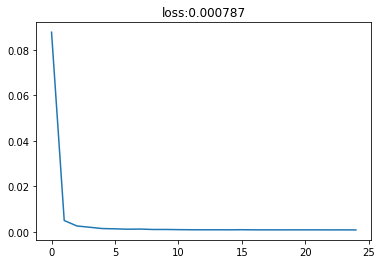

In [65]:
# Create model with dropout
model = Sequential()
model.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Fit model with mean squared error loss function
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape', 'cosine'])
history = model.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

In [66]:
score = model.evaluate(scaled_test_features, test_targets, verbose=0)
print(score)

[0.00042105224040314194, 0.00042105224040314194, 0.014895598775124162, 119.01151711068502, -0.021138210606768848]


In [67]:
train_pred = model.predict(scaled_train_features)
test_pred = model.predict(scaled_test_features)

In [68]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_pred))
print(r2_score(test_targets, test_pred))

0.006255009856767968
-0.014458718543206794


In [18]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [38]:
(train_features.shape[0] - 28) % 64

0

In [96]:
from sklearn.preprocessing import scale

# Standardize the train and test features
scaled_features = scale(features)

In [102]:
scaled_features.shape

(4099, 70)

In [97]:
batch_size = 64
epochs = 120
timesteps = 5

In [112]:
scaled_lstm_features = []
for column in range(scaled_features.shape[1]):
    time_series = []
    for i in range(len(scaled_features) - timesteps):
        time_series.append(scaled_features[i:i + timesteps, column])
#    time_series = np.dstack(time_series)
    scaled_lstm_features.append(time_series)
scaled_lstm_features = np.dstack(scaled_lstm_features)
print(type(scaled_lstm_features))
print(scaled_lstm_features.shape)

<class 'numpy.ndarray'>
(4094, 5, 70)


In [115]:
train_size = int(0.85 * scaled_lstm_features.shape[0])
train_start = train_size % batch_size

scaled_train_features = scaled_lstm_features[train_start:train_size]
train_targets = targets[train_start:train_size]
scaled_test_features = scaled_lstm_features[train_size:]
test_targets = targets[train_size:-5]

print(scaled_train_features.shape, train_targets.shape)
print(scaled_test_features.shape, test_targets.shape)


(3456, 5, 70) (3456,)
(615, 5, 70) (615,)


Train on 3456 samples, validate on 615 samples
Epoch 1/120
 - 5s - loss: 0.0484 - val_loss: 0.0988
Epoch 2/120
 - 1s - loss: 0.0393 - val_loss: 0.0696
Epoch 3/120
 - 1s - loss: 0.0474 - val_loss: 0.0365
Epoch 4/120
 - 1s - loss: 0.0379 - val_loss: 0.0584
Epoch 5/120
 - 1s - loss: 0.0151 - val_loss: 0.0572
Epoch 6/120
 - 1s - loss: 0.0111 - val_loss: 0.0368
Epoch 7/120
 - 1s - loss: 0.0122 - val_loss: 0.0415
Epoch 8/120
 - 1s - loss: 0.0085 - val_loss: 0.0174
Epoch 9/120
 - 1s - loss: 0.0083 - val_loss: 0.0154
Epoch 10/120
 - 1s - loss: 0.0074 - val_loss: 0.0149
Epoch 11/120
 - 1s - loss: 0.0032 - val_loss: 0.0244
Epoch 12/120
 - 1s - loss: 0.0026 - val_loss: 0.0247
Epoch 13/120
 - 1s - loss: 0.0027 - val_loss: 0.0180
Epoch 14/120
 - 1s - loss: 0.0029 - val_loss: 0.0198
Epoch 15/120
 - 1s - loss: 0.0022 - val_loss: 0.0219
Epoch 16/120
 - 1s - loss: 0.0019 - val_loss: 0.0209
Epoch 17/120
 - 1s - loss: 0.0024 - val_loss: 0.0235
Epoch 18/120
 - 1s - loss: 0.0027 - val_loss: 0.0142
Epoch 19

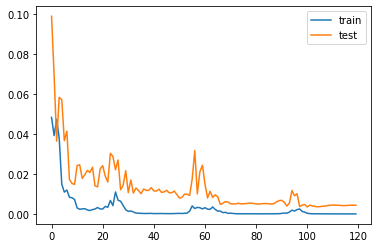

In [116]:
model = Sequential()
model.add(LSTM(50, input_shape=(scaled_train_features.shape[1], scaled_train_features.shape[2])))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

history = model.fit(scaled_train_features, train_targets, epochs=epochs, batch_size=batch_size, 
                    validation_data=(scaled_test_features, test_targets), verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [148]:
train_pred = model.predict(scaled_train_features)
test_pred = model.predict(scaled_test_features)

In [149]:
from sklearn.metrics import r2_score

# Evaluate the R^2 scores
print(r2_score(train_targets, train_pred))
print(r2_score(test_targets, test_pred))

0.6930162619578094
-10.148181254124863


In [152]:
test_targets.values

array([-0.00209874,  0.00368121,  0.01315855,  0.01817798,  0.01584831,
        0.0098538 ,  0.00681122, -0.00207768, -0.0166889 , -0.01794165,
       -0.01482254, -0.01599701, -0.0139165 , -0.03892839, -0.03573805,
       -0.03816577, -0.03356719, -0.03324881,  0.00316152,  0.00702771,
        0.01019658,  0.0034322 , -0.01096304, -0.01205292, -0.01689747,
       -0.02386812, -0.02243872, -0.01371486, -0.01718797, -0.01134123,
       -0.01075884, -0.00573707,  0.00252728,  0.00507709, -0.00211297,
        0.00282562,  0.00309583,  0.00490442,  0.0012624 , -0.00056441,
        0.00690049, -0.03452154, -0.04141029, -0.04610936, -0.04163645,
       -0.05287406, -0.00595995, -0.01149113,  0.00058787,  0.0045658 ,
        0.00900852, -0.00540873,  0.00029437, -0.00176258,  0.0060115 ,
        0.00117127,  0.00367541,  0.00367757, -0.00235426, -0.00728654,
       -0.00745527, -0.00512711, -0.01773408, -0.01312167, -0.01262623,
       -0.00500944, -0.00839158,  0.01059376, -0.02390609, -0.03

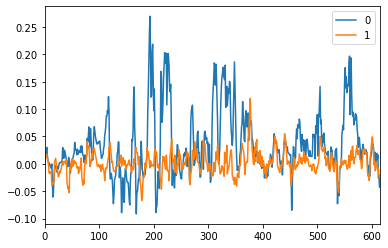

In [155]:
pd.concat([pd.Series(test_pred.transpose()[0]),pd.Series(test_targets.values)], axis=1).plot()

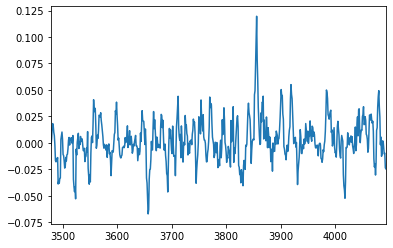

In [157]:
df['loblaw_5d_future_pct'][train_size:-5].plot()

In [30]:
model = Sequential()
#model.add(Embedding(train_features.shape[0], 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(train_features.values, train_targets.values, batch_size=32, epochs=25, validation_data=\
        (test_features.values, test_targets.values))
model.evaluate(test_features.values,test_targets,batch_size=32)

ValueError: Input 0 is incompatible with layer lstm_5: expected ndim=3, found ndim=2